* Plotting ATL012 data for selected region.

* loop through files in a directory, or a single file
* loop through beams or a single beam 

In [ ]:

# need to download data to plot
#aws s3 sync s3://pangeo-data-upload-oregon/icesat2/atl12 ./data

In [23]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import h5py
import cartopy.crs as ccrs
import numpy as np

def list_files_local(path):
    """ Get file list form local folder. """
    from glob import glob
    return glob(path)

# single file
#fname='./data/processed_ATL12_20190213152833_07210201_001_01.h5'
files = list_files_local('./data/processed_ATL12_20190213152833_07210201_001_01.h5')


# or loop through multiple files
#files = list_files_local('./processed_ATL12_2019*_001_01.h5')

# Select a region of interest
lonmin = -180. 
lonmax = -100.
latmin = 60
latmax = 80
    
# Each beam is a group
group = ['/gt1l', '/gt1r', '/gt2l', '/gt2r', '/gt3l', '/gt3r']



179.98195746513642 -179.99789055179556
179.97624448450583 -179.95718244565197
179.99284832870217 -179.98995144514737
179.9749940283617 -179.95359246219402
179.99983103257318 -179.99264728290382
179.93962175211277 -179.9909413083852


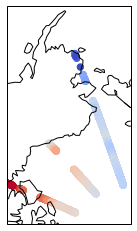

In [24]:
ax = plt.axes(projection=ccrs.NorthPolarStereo())

for fname in files:


    # Loop trough beams
    for k,g in enumerate(group):
    
#-----------------------------------#
# 1) Read in data for a single beam #
#-----------------------------------#
    
        # Load variables into memory (more can be added!)
        with h5py.File(fname, 'r') as fi:
            lats = fi[g+'/ssh_segments/latitude'][:]
            lons = fi[g+'/ssh_segments/longitude'][:]
            x = fi[g+'/ssh_segments/heights/h'][:]

        print(lons.max(),lons.min())          
#        print(lats.max(),lats.min())           
#        print(x.max(),x.min())           
    
        bbox_mask = (lons >= lonmin) & (lons <= lonmax) & (lats >= latmin) & (lats <= latmax)
         # Only keep good data, and data inside bbox
        mask = (bbox_mask == 1) & (np.abs(x) < 10e3) 
        lats, lons, x = lats[mask], lons[mask], x[mask]
    #    print(x.max(),x.min())

        plt.scatter(lons, lats, c=x,  \
            transform=ccrs.Geodetic(),cmap='coolwarm_r')


#plt.colorbar(label='height')
ax.coastlines()
# Limit the map to -60 degrees latitude and below.
ax.set_extent([-180, -150, 85, 55], ccrs.PlateCarree())

